# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.ticker import StrMethodFormatter
%matplotlib inline 

from matplotlib import style
from matplotlib.ticker import FuncFormatter

# Create two new dataframes
north_df = pd.read_csv("C:\\Users\\launchcode\\Desktop\\CoderGirl\\call-center-cleanup-assignment-main\\call-center-cleanup-assignment-main\\NorthCallCenter.csv")
south_df = pd.read_csv("C:\\Users\\launchcode\\Desktop\\CoderGirl\\call-center-cleanup-assignment-main\\call-center-cleanup-assignment-main\\SouthCallCenter.csv")
# Checking to see if data loaded
north_df.head()
south_df.head(150)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,South,Sales Support,10:00 AM,Outgoing,C,Alice,NO,0,0,11,2,NaN,4,1
146,146,South,Sales Support,10:00 AM,Outgoing,D,Josh,NO,0,0,10,1,NaN,4,1
147,147,South,Sales Support,10:00 AM,Outgoing,D,Karl,NO,0,0,11,3,NaN,4,1
148,148,South,Sales Support,10:00 AM,Outgoing,C,Alice,NO,0,0,11,3,NaN,2,1


In [2]:
# Put your EDA code here
# Use df.unique() to count the number of employees at each branch
print(north_df['Rep ID'].unique())
print(south_df['Rep ID'].unique())

# Exploring the statistical values of the data
north_df.describe()
south_df.describe()

#Time Block count for each branch and the whole company
North_Group_TimeBlock_sort=north_df.sort_values('Time Block')
North_Group_TimeBlock_count=North_Group_TimeBlock_sort.groupby(['Time Block'])['Calls'].count()
South_Group_TimeBlock_sort=south_df.sort_values('Time Block')
South_Group_TimeBlock_count=South_Group_TimeBlock_sort.groupby(['Time Block'])['Calls'].count()
print(f"North {North_Group_TimeBlock_count}\n")
print(f"South {South_Group_TimeBlock_count}")

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']
['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']
North Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64

South Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64


### EDA Results

Make note of your results here!

1. How many reps are in each branch?
There are 9 reps in the north and 11 reps in the south.
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
The North Branch average busy minutes is 9.99, not ready minutes 1.91, incoming wait time 3.05 and during call wait time 2.96. 
The South Branch average busy minutes is 10.05, not ready minutes 1.91, incoming wait time 3.00 and during call wait time 3.08.
3. What is the number of calls taken for each time block?
In the North busy, not ready and during time calls are 234 and incoming is 82
In the South busy, not ready and during time calls are 314 and incoming is 126

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:
1. How many reps are in each branch? 
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?9
3. What is the number of calls taken for each time block?

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [82]:
# Clean your data here
# Checking to see if Incoming wait Time NAN values correspond to Outgoing Time
north_df1 = north_df.groupby('Incoming or Outgoing')
df2 = north_df1.get_group('Incoming')
df3 = north_df1.get_group('Outgoing')
print(df2['Incoming Wait Time'].isnull().values.any())
print(df3['Incoming Wait Time'].isnull().sum())

# Change the values in sale to all upper case letters
north_df['Sale'] = north_df['Sale'].str.upper()

# Checking for duplicates
north_df.duplicated()
south_df.duplicated()

# Removing unnecessary columns
north_df.pop("Unnamed: 0")
south_df.pop("Unnamed: 0")
north_df.head()


False
163


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Yes the null do correspond to outgoing calls. I split the data into incoming and outgoing groups and checked for null values in each group according to Incoming Wait Time.
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
I rectified the issue by making all the entries upper case. I did this because the different cases could lead to erroneous calculations and miss intrepreation of the data.
3. Are there duplicates in the two data sets? If there are, how did you handle them?
I ran the duplicate function and both datasets showed no duplicates
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
The unnamed column in both data sets are unnecessary. I will make two data sets that does not contain the unnamed column.  

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [3]:
# Manipulate data here
# Concat the data sets
df = pd.concat([north_df,south_df])
df.head()
#grouping by Rep Id and sorting by Branch to determine the rep from each branch with highest number of calls
rep_id_group = df.groupby(["Rep ID", "Branch"])
rep_id_sum = rep_id_group.sum()
sort_calls = rep_id_sum.sort_values(by = (["Calls"]), ascending=[False])
sort_groupby_branch = sort_calls.sort_values( by = (["Branch"]))
sort_groupby_branch

#subseting data into north and south branches
north_branch = sort_groupby_branch.iloc[0:9].sort_values(by = (["Calls"]), ascending = [False])
south_branch = sort_groupby_branch.iloc[10:21].sort_values(by = (["Calls"]), ascending = [False])
north_branch.head()

#print rep with highest call form both branches
print(f"Rep and Branch of highest calls {north_branch.index[0]} Number of Calls {north_branch['Calls'].loc[north_branch['Calls'].idxmax()]}")
print(f"Rep and Branch of highest calls {south_branch.index[0]} Number of Calls {south_branch['Calls'].loc[south_branch['Calls'].idxmax()]}")
print("\n")

# Measuring efficiency
# Using the .mean to find the average of the abandon time for the company and each branch(using the sorted by dataframe)
#Company mean printed
branch_rep_mean=(sort_groupby_branch['Abandoned'])/(sort_groupby_branch['Calls'].sum())

print(f"Company Mean Value for Abandoned Calls: {branch_rep_mean.sum():.2f}")

#Each Branch mean printed
north_branch_mean=north_branch['Abandoned']/north_branch['Calls'].sum()
south_branch_mean=south_branch['Abandoned']/south_branch['Calls'].sum()

print(f"North Branch Mean Value for Abandoned Calls: {north_branch_mean.sum():.2f}")
print(f"South Branch Mean Value for Abandoned Calls: {south_branch_mean.sum():.2f}")
print("\n")

#Calculating and printing the Sevice Level of the company and each Branch. sevice_level= ((incoming wait time}sum/(Incoming)sum)*100(using the orginal dataframe)
company_service_level = (((df["Incoming Wait Time"]<=2).sum())/((df["Calls"]).sum()))*100
north_service_level = (((north_df["Incoming Wait Time"]<=2).sum())/((north_df["Calls"]).sum()))*100
south_service_level = (((south_df["Incoming Wait Time"]<=2).sum())/((south_df["Calls"]).sum()))*100
                       
print(f"The Company Service Level {company_service_level:.1f}.")
print(f"The North Branch Service Level {north_service_level:.1f}.")
print(f"The South Branch Service Level {south_service_level:.1f}.")
print('\n')
                       
#Calculating the average speed of answer calls for the company and both branches(Average speed = (Total Incoming Wait Time)/(Total            
#Calculating the Company Average Speed
company_aver_speed =((df["Incoming Wait Time"]<=2).sum())/((df["Calls"]).sum()) 

print(f"The Company Average Speed: {company_aver_speed:.1f}")

#Calculating the average speed of North Branch
north_aver_speed = ((north_df["Incoming Wait Time"]<=2).sum())/((north_df["Calls"]).sum())

print(f"The North Branch Average Speed: {north_aver_speed:.1f}")

#Calculating the average speed of South Branch
south_aver_speed = ((south_df["Incoming Wait Time"]<=2).sum())/((south_df["Calls"]).sum())

print(f"The South Average Speed: {south_aver_speed:.1f}")
print("\n")


Rep and Branch of highest calls ('Brent', 'North') Number of Calls 37
Rep and Branch of highest calls ('Eric', 'South') Number of Calls 35


Company Mean Value for Abandoned Calls: 0.02
North Branch Mean Value for Abandoned Calls: 0.03
South Branch Mean Value for Abandoned Calls: 0.01


The Company Service Level 14.5.
The North Branch Service Level 13.5.
The South Branch Service Level 15.3.


The Company Average Speed: 0.1
The North Branch Average Speed: 0.1
The South Average Speed: 0.2




### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

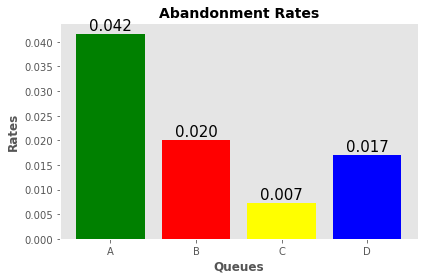

<Figure size 432x288 with 0 Axes>

In [84]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
 
#Crating a bar graph to compare the abandoned calls
style.use('ggplot')

# Sort by key and return a list of tuples
lists = sorted(abandonment_rates.items())

# Unpack a list of pairs into two tuples
x, y = zip(*lists) 
colors = ("Green", "Red", "Yellow", "Blue")#set colors for individual bars

#create the bar graph
rate_group = plt.bar(x, y, color = colors)

#Iterate over the bars and use the annotate function to print actual values on top of the bar
for bar in rate_group:
    plt.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', 
             va = 'center', size=15, xytext = (0, 8), textcoords = 'offset points')
    
#format the style of the graph and add visual attributes   
plt.title("Abandonment Rates", fontsize=14, fontweight = "bold")
plt.xlabel("Queues", fontsize = 12, fontweight = "bold")
plt.ylabel("Rates", fontsize = 12, fontweight = "bold")
plt.grid(False)
plt.tight_layout()#to ensure that the annotation fits 
plt.show()
plt.savefig('abandonment_rate_bar_graph.png')

In [85]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
print(north_plt)
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
quick_stats
total_stats
service_level
print(plt.style.available)

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


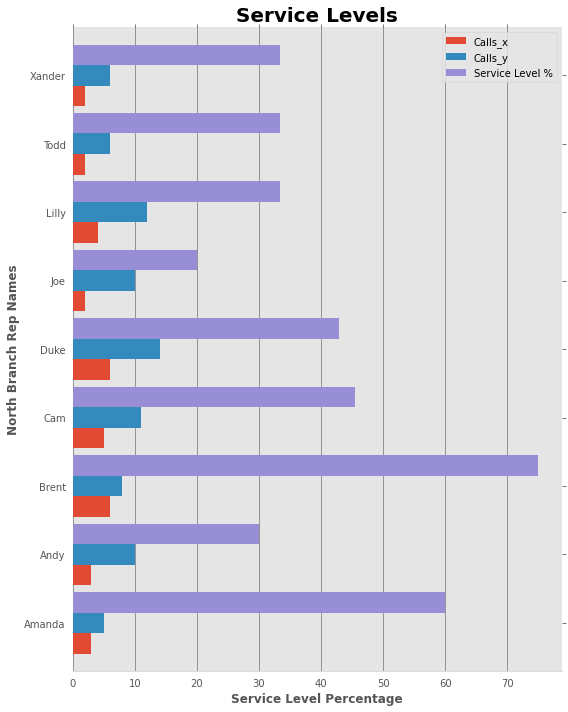

<Figure size 432x288 with 0 Axes>

In [86]:

#Create a horizontal bar graph to display the serivce level in each north branch rep
ax = service_level.plot(kind = 'barh', figsize = (8,10), width = 0.9)    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#format the style of the graph
# Set x-axis label
ax.set_xlabel("Service Level Percentage", fontsize=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("North Branch Rep Names", fontsize=20, weight='bold', size=12)
ax.set_title("Service Levels", fontsize=20, weight="bold")
# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#format visual attributes of the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

#Add a horizontal gray grid (keep the vertical grid hidden).
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='Gray')
ax.yaxis.grid(False)
plt.tight_layout()

plt.show()
plt.savefig("Service_Level_barh_graph.png")

In [5]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
print(purpose_counts)

NameError: name 'purpose_group' is not defined

C:\Users\launchcode\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


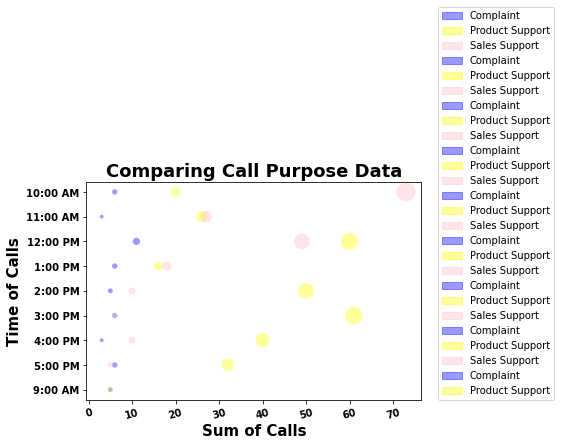

In [20]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times2 = call_times.sort_values(by = 'Time Block', ascending=True, inplace=False)#sorted by time block values

# Use groupby to plot based on time blocks:
time_block_group=call_times2.groupby(["Time Block"])
time_block_group2=call_times2.groupby(["Time Block"]).sum()
#time_block_group.head()

# Use groupby and get_group to select which call purpose to plot:
#Create a scatter plot with annotations to display the difference in amount of each call purpose in each time block
#Format data for the bubble graph

Sales_support = call_times2.groupby(["Time Block","Call Purpose"])["Calls"].sum().reset_index()
sales_support2 = Sales_support.assign(BubbleColors=["Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink",
                                                    "Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink",
                                                    "Blue","Yellow"])
x=sales_support2["Calls"].values.flatten()
y=sales_support2["Time Block"].values.flatten()
bubble_size=sales_support2["Calls"]
bubble_colors=sales_support2["BubbleColors"]
labels=sales_support2["Call Purpose"]

#Create the bubble graph
ax=sb.scatterplot(x,y,s = bubble_size*5, alpha = 0.4, c=bubble_colors)

#Annotate the points on the graph with the call purpose
#for i, txt in enumerate(labels):
#    ax.annotate(txt, (x[i],y[i]), rotation=5)

#Create a legend
call_purpose_list=list(sales_support2["Call Purpose"])
bubble_color_list=list(sales_support2["BubbleColors"])
legend_handle =[]

for i in range(0,len(sales_support2.index)):
    legend_handle.append(mpatches.Patch(color=bubble_color_list[i], alpha=0.4, label=call_purpose_list[i]))
    
plt.legend(handles=legend_handle, loc=(1.05,0))
    
#Format the style of the graph
plt.xticks(rotation=15, weight="bold")
plt.yticks(weight="bold")
plt.xlabel("Sum of Calls",fontsize=15, weight="bold")
plt.ylabel("Time of Calls",fontsize=15, weight='bold')
plt.title('Comparing Call Purpose Data', color = 'black', fontsize=18, weight="bold")
 
plt.savefig("Comparing_Call_Purpose_Data_scat_graph.png")

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

For my first chart I chose a vertical bar graph because it visualized the differents in the amount of calls each queue recieved.
For my second graph I chose a horizontal bar graph because it visualized the differents in the goals. I displayed the different calls so each person could see where they could improve and move their service level bar closer to the target.
For my thrid graph I chose a scattered plot, however it did not do what a wanted it to do but I liked it and was trying to figure out how to sum each data point and use bubble points to convey the difference in each call purposes in each time block,

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
Using the results I obtain I see that they are close in service level and average speed. However the North Branch experience more abandon calls than the South Branch. Using this information I decided that the South Branch was more efficient.
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
I feel the North would benefit more based on that criteria and the information I have.
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
I would have like to know what the A,B,C, and D stood for in queues so I could have added that to a legend. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(queues))
    plt.bar(index, )
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

In [4]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times2 = call_times.sort_values(by = 'Time Block', ascending=True, inplace=False)#sorted by time block values

# Use groupby to plot based on time blocks:
time_block_group=call_times2.groupby(["Time Block"])
time_block_group2=call_times2.groupby(["Time Block"]).sum()
#time_block_group.head()

# Use groupby and get_group to select which call purpose to plot:
#Create a scatter plot with annotations to display the difference in amount of each call purpose in each time block
#Format data for the bubble graph
Sales_support = call_times2.groupby(["Time Block","Call Purpose"])["Calls"].sum().reset_index()
sales_support2 = sales_support.assign(BubbleColors=["Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink",
                                                    "Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink",
                                                    "Blue","Yellow"])
x=sales_support2["Calls"].values.flatten()
y=sales_support2["Time Block"].values.flatten()
bubble_size=sales_support2["Calls"]
bubble_colors=sales_support2["BubbleColors"]
labels=sales_support2["Call Purpose"]

#Create the bubble graph
ax=sb.scatterplot(x,y,s = size*5, alpha = 0.4, c=bubble_colors)

#Annotate the points on the graph with the call purpose
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i],y[i]), rotation=5)

#Create a legend
call_purpose_list=list(sales_support2["Call Purpose"].iloc[0:2])
bubble_color_list=list(sales_support2["BubbleColors"].iloc[0:2])
legend_handle =[]

for i in range(0,len(sales_support2.index)):
    legend_handle.append(mpatches.Patch(color=bubble_color_list[i], alpha=0.4, label=call_purpose_list[i]))
    
plt.legend(handles=legend_handle, loc=(1.05,0))
    
#Format the style of the graph
plt.xticks(rotation=15, weight="bold")
plt.yticks(weight="bold")
plt.xlabel("Call Purposes",fontsize=15, weight="bold")
plt.ylabel("Call Times",fontsize=15, weight='bold')
plt.title('Comparing Call Purpose Data', color = 'black', fontsize=18, weight="bold")
 
plt.savefig("Comparing_Call_Purpose_Data_scat_graph.png")

NameError: name 'sales_support' is not defined

In [ ]:
sales_support = call_times2.groupby(["Time Block","Call Purpose"])["Calls"].sum().reset_index()

sales_support2 = sales_support.assign(BubbleColors=["Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink",
                                                    "Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink","Blue","Yellow","Pink",
                                                    "Blue","Yellow"])
sales_support2